<a href="https://colab.research.google.com/github/chaeun6-cmd/New-repository/blob/main/%EC%9B%94%EB%B3%84_%EC%83%81%ED%92%88%EA%B5%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

# 통계 분석 및 가설 검정
from scipy import stats
import statsmodels.api as sm

# 머신러닝 (Scikit-learn)
from sklearn.model_selection import train_test_split  # 데이터 분할
from sklearn.preprocessing import StandardScaler      # 스케일링
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score # 평가 지표

# 주요 알고리즘 샘플
from sklearn.linear_model import LinearRegression     # 선형 회귀
from sklearn.ensemble import RandomForestClassifier  # 랜덤 포레스트

In [2]:
df = pd.read_excel("/content/Online_Retail.xlsx")

#전처리 과정

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [7]:
# 중복 제거
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# customerID이 없는 행 제거하고 새로운 데이터프레임 생성
df = df.dropna(subset=["CustomerID"]).copy()
df["CustomerID"] = df["CustomerID"].astype("int64")

# 공백처리
df["StockCode"] = df["StockCode"].astype(str)
df["StockCode_clean"] = (df["StockCode"].str.replace(r"\s+", "", regex=True))

#StockCode 알파벳 행 확인
df[df["StockCode_clean"].str.fullmatch(r"[A-Za-z]+", na=False)]["StockCode"].unique()

#StockCode가 알파벳으로만 이루어진 행 제거
df = df[~df["StockCode_clean"].str.fullmatch(r"[A-Za-z]+", na=False)].copy()
df = df[~df["StockCode_clean"].eq("C2")].copy()
df.drop(columns=["StockCode_clean"], inplace=True)

#데이터 타입 변환 및 파생변수 생성

In [10]:
# 데이터 타입 변환
df["Description"] = df["Description"].astype(str)   # 문자열 변환

df["Description"] = df["Description"].str.upper()   # 대문자 통일

df["Description"] = df["Description"].str.strip()   # 앞 뒤 공백 제거

df["Description"] = df["Description"].str.replace(r"\s+", " ", regex=True)  # 여러 공백을 하나로

In [11]:
# 총 판매 금액 변수 생성
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [12]:
# Invoice를 datetime으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 시계열 파생변수(연도-월)
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# 시간대
df['Hour'] = df['InvoiceDate'].dt.hour

# 요일 정보 (0=월 1=화 ... 6=일)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 날짜 추출 (Y-M-D)
df['Date'] = df['InvoiceDate'].dt.date

In [ ]:
# RFM 데이터 프레임
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": "max",
    "InvoiceNo": "nunique",
    "TotalAmount": "sum"
}).reset_index()

rfm["Recency"] = (reference_date - rfm["InvoiceDate"]).dt.days

# 필요한 최종 컬럼만 선택
rfm = rfm.rename(columns={
    "InvoiceNo": "Frequency",
    "TotalAmount": "Monetary"
})

#환불 및 이상치(취소) 처리

In [13]:

# # 국가별 매출 및 비중 집계
country_sales = (df.groupby("Country")["TotalAmount"].sum()
.reset_index())

country_sales.columns = ["Country", "TotalAmount"]

# 매출 비중(%) 계산
total_revenue = country_sales["TotalAmount"].sum()
country_sales["sales_ratio"] = (country_sales["TotalAmount"] / total_revenue) * 100

# 매출 상위 10개 국가 추출
top_countries = country_sales.sort_values("TotalAmount", ascending=False).head(10)

# 결과 요약 출력
print(f"--- [국가별 매출 분석 결과 (Top 10)] ---")
print(f"전체 총 매출액: {total_revenue:,.0f} £\n")

# 가독성을 위한 포맷팅
summary = top_countries.copy()
summary["TotalAmount"] = summary["TotalAmount"].apply(lambda x: f"{x:,.0f} £")
summary["sales_ratio"] = summary["sales_ratio"].apply(lambda x: f"{x:.2f}%")

print(summary[["Country", "TotalAmount", "sales_ratio"]].to_string(index=False))

--- [국가별 매출 분석 결과 (Top 10)] ---
전체 총 매출액: 8,265,477 £

       Country TotalAmount sales_ratio
United Kingdom 6,802,546 £      82.30%
   Netherlands   283,480 £       3.43%
          EIRE   246,732 £       2.99%
       Germany   200,620 £       2.43%
        France   181,386 £       2.19%
     Australia   136,922 £       1.66%
   Switzerland    51,859 £       0.63%
         Spain    51,747 £       0.63%
       Belgium    36,663 £       0.44%
         Japan    35,420 £       0.43%


#RFM 분석

In [ ]:
# RFM 점수 계산
# Recency: 낮을수록 좋음 (최근 방문) -> labels=[5, 4, 3, 2, 1]
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)

# Frequency & Monetary: 높을수록 좋음 -> labels=[1, 2, 3, 4, 5]
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)

# RFM 통합 점수 계산
rfm['RFM_score'] = rfm['R_score'] + rfm['F_score'] + rfm['M_score']

# 고객 세그먼트 분류 함수 정의 및 적용
cutoff_score = rfm['RFM_score'].quantile(0.8)    # 상위 20%

def segment_customer(score):
    # 계산된 기준 점수(cutoff_score) 이상이면 VIP
    if score >= cutoff_score:
        return "VIP"
    else:
        return "일반"

rfm['Customer_Segment'] = rfm['RFM_score'].apply(segment_customer)

segment_stats = rfm['Customer_Segment'].value_counts().to_frame(name='고객수')
segment_stats['비율(%)'] = (rfm['Customer_Segment'].value_counts(normalize=True) * 100).round(1)

# 세그먼트별 점수 평균 계산
segment_means = rfm.groupby('Customer_Segment')[['R_score', 'F_score', 'M_score', 'RFM_score']].mean().round(2)

# 결과 출력
print("--- 고객 세그먼트별 분포 ---")
display(segment_stats)
print("\n--- 세그먼트별 주요 지표 평균 ---")
display(segment_means)

# 각 그룹 샘플 추출 (필요시 사용)
vip_customers = rfm[rfm['Customer_Segment'] == 'VIP']
normal_customers = rfm[rfm['Customer_Segment'] == '일반']# RFM 점수 계산
# Recency: 낮을수록 좋음 (최근 방문) -> labels=[5, 4, 3, 2, 1]
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)

# Frequency & Monetary: 높을수록 좋음 -> labels=[1, 2, 3, 4, 5]
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)

# RFM 통합 점수 계산
rfm['RFM_score'] = rfm['R_score'] + rfm['F_score'] + rfm['M_score']

# 고객 세그먼트 분류 함수 정의 및 적용
cutoff_score = rfm['RFM_score'].quantile(0.8)    # 상위 20%

def segment_customer(score):
    # 계산된 기준 점수(cutoff_score) 이상이면 VIP
    if score >= cutoff_score:
        return "VIP"
    else:
        return "일반"

rfm['Customer_Segment'] = rfm['RFM_score'].apply(segment_customer)

segment_stats = rfm['Customer_Segment'].value_counts().to_frame(name='고객수')
segment_stats['비율(%)'] = (rfm['Customer_Segment'].value_counts(normalize=True) * 100).round(1)

# 세그먼트별 점수 평균 계산
segment_means = rfm.groupby('Customer_Segment')[['R_score', 'F_score', 'M_score', 'RFM_score']].mean().round(2)

# 결과 출력
print("--- 고객 세그먼트별 분포 ---")
display(segment_stats)
print("\n--- 세그먼트별 주요 지표 평균 ---")
display(segment_means)

# 각 그룹 샘플 추출 (필요시 사용)
vip_customers = rfm[rfm['Customer_Segment'] == 'VIP']
normal_customers = rfm[rfm['Customer_Segment'] == '일반']

--- 고객 세그먼트별 분포 ---


,고객수,비율(%)
Customer_Segment,,
일반,3409,78.1
VIP,954,21.9



--- 세그먼트별 주요 지표 평균 ---


,R_score,F_score,M_score,RFM_score
Customer_Segment,,,,
VIP,4.56,4.78,4.72,14.06
일반,2.59,2.50,2.52,7.62


--- 고객 세그먼트별 분포 ---


,고객수,비율(%)
Customer_Segment,,
일반,3409,78.1
VIP,954,21.9



--- 세그먼트별 주요 지표 평균 ---


,R_score,F_score,M_score,RFM_score
Customer_Segment,,,,
VIP,4.56,4.78,4.72,14.06
일반,2.59,2.50,2.52,7.62


#금액 및 상품 정제

In [14]:
# 고객 ID 결측치 제거
df = df[df["CustomerID"].notna()]

# 수량/가격 필터링
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# 문자열 변환
df["StockCode"] = df["StockCode"].astype(str)
df["Description"] = df["Description"].astype(str)

# 비상품(서비스 항목-배송비, 운송비, 은행 수수료, 온라인 배송비, 샘플 상품) 키워드 정의
service_keywords = ["POST", "CARRIAGE", "BANK", "DOTCOM", "SAMPLE"]
pattern = "|".join(service_keywords)

# 비상품 제거
df = df[
    ~df["StockCode"].str.contains(pattern, case=False, na=False) &
    ~df["Description"].str.contains(pattern, case=False, na=False)
]


# 상품 데이터 정형화(문자열 변환)
df["Description"] = df["Description"].astype(str)

# 대문자 통일
df["Description"] = df["Description"].str.upper()

# 앞뒤 공백 제거
df["Description"] = df["Description"].str.strip()

# 여러 공백을 하나로
df["Description"] = df["Description"].str.replace(r"\s+", " ", regex=True)

# 기준일 생성(최근성을 계산하기 위해)
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

# 가장 최근 구매 날짜/몇 번 주문했는지/총 구매 금액
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": "max",
    "InvoiceNo": "nunique",
    "TotalAmount": "sum"
}).reset_index()

# 생성된 기준일을 기준으로 계산
rfm["Recency"] = (reference_date - rfm["InvoiceDate"]).dt.days

# 컬럼 이름 변환
rfm = rfm.rename(columns={
    "InvoiceNo": "Frequency",
    "TotalAmount": "Monetary"
})

rfm.head()

,CustomerID,InvoiceDate,Frequency,Monetary,Recency
0,12346,2011-01-18 10:01:00,1,77183.60,326
1,12347,2011-12-07 15:52:00,7,4310.00,2
2,12348,2011-09-25 13:13:00,4,1437.24,75
3,12349,2011-11-21 09:51:00,1,1457.55,19
4,12350,2011-02-02 16:01:00,1,294.40,310


In [ ]:
rfm.tail()

,CustomerID,InvoiceDate,Frequency,Monetary,Recency
4329,18280,2011-03-07 09:52:00,1,180.60,278
4330,18281,2011-06-12 10:53:00,1,80.82,181
4331,18282,2011-12-02 11:43:00,2,178.05,8
4332,18283,2011-12-06 12:02:00,16,2035.23,4
4333,18287,2011-10-28 09:29:00,3,1819.88,43


#검증 및 요약

In [ ]:
# 주문 단위 집계
invoice_df = df.groupby(
    ["CustomerID", "InvoiceNo"]
).agg(
    OrderDate=("InvoiceDate", "min"),
    OrderAmount=("TotalAmount", "sum")
).reset_index()

# 기준 날짜 설정
reference_date = invoice_df["OrderDate"].max() + dt.timedelta(days=1)

In [ ]:
rfm.head()

,CustomerID,InvoiceDate,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_score,Customer_Segment
0,12346,2011-01-18 10:17:00,2,0.00,326,1,2,1,4,일반
1,12347,2011-12-07 15:52:00,7,4310.00,2,5,5,5,15,VIP
2,12348,2011-09-25 13:13:00,4,1437.24,75,2,4,4,10,일반
3,12349,2011-11-21 09:51:00,1,1457.55,19,4,1,4,9,일반
4,12350,2011-02-02 16:01:00,1,294.40,310,1,1,2,4,일반


In [ ]:
# 주문 단위 데이터를 고객 단위로 요약 집계
rfm = invoice_df.groupby("CustomerID", as_index=False).agg(
    LastPurchaseDate=("OrderDate", "max"),    #가장 최근 주문일
    FirstPurchaseDate=("OrderDate", "min"),   # 첫 주문일
    Frequency=("InvoiceNo", "nunique"),       # 최근 주문일이 얼마나 지났는지(일 단위)
    Monetary=("OrderAmount", "sum"),
)
# 고객이 마지막으로 구매한 날로부터 몇 일이 지났는지 계산
rfm["Recency"] = (reference_date - rfm["LastPurchaseDate"]).dt.days

print("rfm rows:", len(rfm))
display(rfm.head())

rfm rows: 4363


,CustomerID,LastPurchaseDate,FirstPurchaseDate,Frequency,Monetary,Recency
0,12346,2011-01-18 10:17:00,2011-01-18 10:01:00,2,0.00,326
1,12347,2011-12-07 15:52:00,2010-12-07 14:57:00,7,4310.00,2
2,12348,2011-09-25 13:13:00,2010-12-16 19:09:00,4,1437.24,75
3,12349,2011-11-21 09:51:00,2011-11-21 09:51:00,1,1457.55,19
4,12350,2011-02-02 16:01:00,2011-02-02 16:01:00,1,294.40,310


In [ ]:
# 점수화(5점 척도)
rfm["R_score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1]).astype(int)
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)
rfm["M_score"] = pd.qcut(rfm["Monetary"].rank(method="first"), 5, labels=[1,2,3,4,5]).astype(int)

rfm["RFM_score"] = rfm["R_score"] + rfm["F_score"] + rfm["M_score"]

In [ ]:
# 신규(첫 구매 고객) 정의: Frequency==1
rfm["NewCustomer"] = rfm["Frequency"].eq(1)

In [ ]:
# VIP/일반 고객 나누기(신규 고객 제외)
rfm["rfm_pct"] = rfm.loc[~rfm["NewCustomer"], "RFM_score"].rank(method="first", pct=True)

# 기본값을 일반으로
rfm["Segment"] = "일반"

# 신규 지정
rfm.loc[rfm["NewCustomer"], "Segment"] = "신규"

# 상위 20%만 VIP
rfm.loc[(~rfm["NewCustomer"]) & (rfm["rfm_pct"] > 0.80), "Segment"] = "VIP"

rfm["Segment"].value_counts()

,count
Segment,
일반,2428
신규,1328
VIP,607


In [ ]:
rfm.head()
rfm.columns

Index(['CustomerID', 'LastPurchaseDate', 'FirstPurchaseDate', 'Frequency',
       'Monetary', 'Recency', 'R_score', 'F_score', 'M_score', 'RFM_score',
       'NewCustomer', 'rfm_pct', 'Segment'],
      dtype='object')

In [ ]:
coupon_list = [0, 3000, 5000, 10000]
margin_rate = 0.1
uplift_map = {
    0: 0.0,
    3000: 0.05,
    5000: 0.08,
    10000: 0.12
}

In [ ]:
# 세그먼트별 지표 비교
segment_summary = rfm.groupby('Segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean',
    'CustomerID':'count'
}).reset_index()

# 세그먼트별 지표 확인
rfm['Segment'].value_counts()

,count
Segment,
General,3138
VIP,922
New,274


#고객별 평균 구매 간격 계산

In [ ]:
# 거래 데이터 정렬
df = df.sort_values(['CustomerID','InvoiceDate'])

# 이전 구매일
df['PrevDate'] = df.groupby('CustomerID')['InvoiceDate'].shift(1)

# 구매 간격(일)
df['Gap'] = (df['InvoiceDate'] - df['PrevDate']).dt.days

# 고객별 평균 구매 간격
gap_df = df.groupby('CustomerID')['Gap'].mean().reset_index()
gap_df.columns = ['CustomerID','AvgPurchaseGap']

In [ ]:
# rfm
rfm = rfm.merge(gap_df, on='CustomerID', how='left')

In [ ]:
# 세그먼트별 구매주기 / 최신 비교
rfm.groupby('Segment').agg({
    'Recency':'mean',
    'AvgPurchaseGap':'mean'
}).reset_index()

,Segment,Recency,AvgPurchaseGap
0,General,120.036648,3.701631
1,New,16.321168,0.096081
2,VIP,13.545553,2.688571


**VIP, 일반고객, 신규 -> 구매주기 초과 (쿠폰 필요 가능성이 높음)**

In [ ]:
# 구매주기 초과 여부
rfm['OverCycle'] = rfm['Recency'] > rfm['AvgPurchaseGap']

rfm.groupby('Segment')['OverCycle'].mean().reset_index()

,Segment,OverCycle
0,General,0.942957
1,New,0.963504
2,VIP,0.875271


**신규 > 일반 고객 > VIP 순으로 쿠폰 타겟 적합**

In [ ]:
# 세그먼트별 재구매율 확인
rfm['SecondPurchase'] = rfm['Frequency'] >= 2

rfm.groupby('Segment')['SecondPurchase'].mean().reset_index()

,Segment,SecondPurchase
0,General,0.591460
1,New,0.182482
2,VIP,1.000000


#1️⃣ VIP → 100%
- 이미 2회 이상 구매한 고객만 포함
- 재구매율 100%
- 쿠폰 필요성 매우 낮음
- 마진만 깍일 가능성이 높음
-> 쿠폰 타켓이 아님

#2️⃣ General → 59%
- 절반 이상은 자연 재구매
- 41% 재구매 안 함
-> 구매 주기 초과 고객(일부)만 쿠폰 타겟팅

#3️⃣ New → 18%
- 신규 고객 중 81%가 재구매 안 함
- 1회성 구매 고객이 많음
- 재구매 전환이 매우 낮음
-> 재구매 유도 쿠폰이 가장 효과적으로 나타날 수 있음

In [ ]:
# 세그먼트별 전체 매출 중 비중 확인(매출 기여도)
segment_revenue = rfm.groupby('Segment')['Monetary'].sum().reset_index()

segment_revenue['RevenueShare'] = (
    segment_revenue['Monetary'] / segment_revenue['Monetary'].sum()
)

segment_revenue

,Segment,Monetary,RevenueShare
0,General,2502294.06,0.287323
1,New,123938.50,0.014231
2,VIP,6082762.77,0.698446


**1. VIP** - 총 매출 약 70% 차지 (핵심 매출원)

**2. 일반 고객** - 총 매출의 약 29% 차지

**3. 신규** - 총 매출의 1.42% 차지

- 시즌성
- 프로모션
- 외부 이벤트
-> 영향으로 객관성이 조금 떨어질 수도 있음

# 월별 잘 팔리는 상품군 알아보기

In [15]:
# 파생 변수 생성(날짜 처리)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")

In [16]:
# 월별 상품 총 판매량(월+상품 기준으로)
monthly_product_sum = (
    df.groupby(["YearMonth", "Description"])["Quantity"]
    .sum()
    .reset_index()
)

In [17]:
# 월별 가장 많이 팔린 상품
idx = monthly_product_sum.groupby("YearMonth")["Quantity"].idxmax()
monthly_best = monthly_product_sum.loc[idx].reset_index(drop=True)

In [34]:
# 해당 상품의 평균 구매 수량
monthly_product_mean = (
    df.groupby(["YearMonth", "Description"])["Quantity"]
    .mean()
    .reset_index()
)

# 월별 1위 상품 + 총 판매량
monthly_best = monthly_best.merge(
    monthly_product_mean,
    on=["YearMonth", "Description"],  # 연-월/그 달에 가장 많이 팔린 상품
    suffixes=("_Total", "_Avg")       # 그 달 총 판매 수량/고객 1회 구매 시 평균 수매 수량
)

monthly_best = monthly_best.sort_values("YearMonth")

print(monthly_best.head(6))

  YearMonth                        Description  Quantity_Total  Quantity_Avg  \
0   2010-12  WORLD WAR 2 GLIDERS ASSTD DESIGNS            5139    177.206897   
1   2011-01     MEDIUM CERAMIC TOP STORAGE JAR           74215  74215.000000   
2   2011-02              EMPIRE DESIGN ROSETTE            3986    996.500000   
3   2011-03            JUMBO BAG RED RETROSPOT            4924     41.033333   
4   2011-04  WORLD WAR 2 GLIDERS ASSTD DESIGNS           10224    269.052632   
5   2011-05               SMALL POPCORN HOLDER            6730     89.733333   

       Quantity  
0    177.206897  
1  74215.000000  
2    996.500000  
3     41.033333  
4    269.052632  
5     89.733333  


# 1. 월별 1위 상품군
**1️⃣ WORLD WAR 2 GLIDERS ASSTD DESIGNS**

👉 2차 세계대전 글라이더 장난감 (여러 디자인 혼합)

종이나 가벼운 재질로 된 비행기 장난감 / 아이들용 저가 장난감일 가능성 높음

여러 달 1위 → 꾸준한 인기상품이라는 것을 확인 할 수 있음


**2️⃣ MEDIUM CERAMIC TOP STORAGE JAR**

👉 중간 크기 세라믹 뚜껑 달린 보관 용기

주방용 저장 용기

한 번에 74,215개 → 거의 도매 대량 납품

**3️⃣ EMPIRE DESIGN ROSETTE**

👉 엠파이어 디자인 장식용 로제트 (장식 리본/배지)

파티용/행사용 장식품 가능성

평균 996개 → 묶음 대량 구매

**4️⃣ JUMBO BAG RED RETROSPOT**

👉 대형 빨간색 레트로 도트무늬 쇼핑백

에코백/시장 가방 스타일

여러 달 1위 → 진짜 베스트셀러 가능성 높음

**5️⃣ SMALL POPCORN HOLDER**

👉 작은 팝콘 용기

파티용/행사용 종이컵 느낌

평균 89개 → 행사 대량 구매 가능성

In [35]:
# 월별 1위 상품만 보기
idx = monthly_product_sum.groupby("YearMonth")["Quantity"].idxmax()
monthly_best = monthly_product_sum.loc[idx]

print(monthly_best.head(6))

      YearMonth                        Description  Quantity
2363    2010-12  WORLD WAR 2 GLIDERS ASSTD DESIGNS      5139
3491    2011-01     MEDIUM CERAMIC TOP STORAGE JAR     74215
5095    2011-02              EMPIRE DESIGN ROSETTE      3986
7619    2011-03            JUMBO BAG RED RETROSPOT      4924
10966   2011-04  WORLD WAR 2 GLIDERS ASSTD DESIGNS     10224
12930   2011-05               SMALL POPCORN HOLDER      6730


**-> 월별 판매량 1위 상품을 통해 스테디셀러와 단발성 대량거래를 구분 가능**


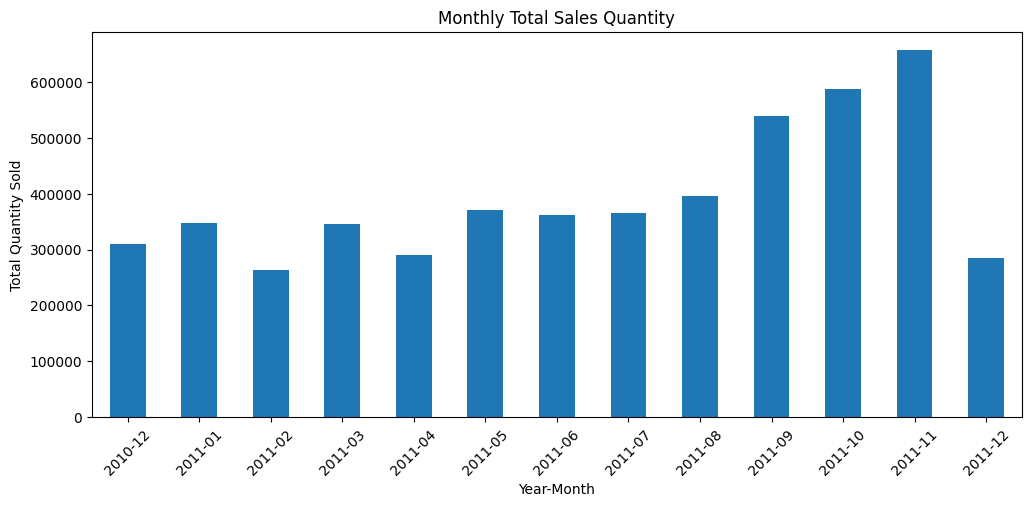

In [30]:
# 월별 전체 판매량
monthly_total = df.groupby("YearMonth")["Quantity"].sum()

plt.figure(figsize=(12,5))
monthly_total.plot(kind="bar")
plt.title("Monthly Total Sales Quantity")
plt.xlabel("Year-Month")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

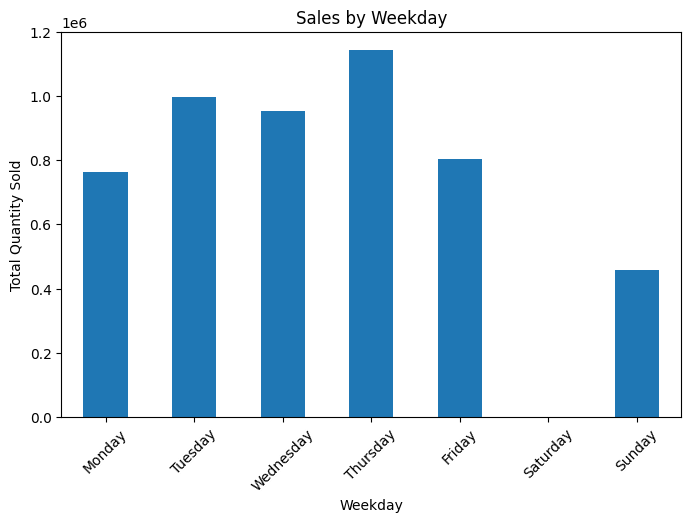

In [40]:
# 요일 기준 시즌성
df["Weekday"] = df["InvoiceDate"].dt.day_name()

weekday_sales = df.groupby("Weekday")["Quantity"].sum()

# 요일 순서 정렬
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday_sales = weekday_sales.reindex(order)

plt.figure(figsize=(8,5))
weekday_sales.plot(kind="bar")
plt.title("Sales by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()


- 월~금 → 영업일

- 토요일 → 휴무

- 일요일 → 일부 거래 존재


-> 대부분 거래가 평일 패턴일 가능성이 높음.

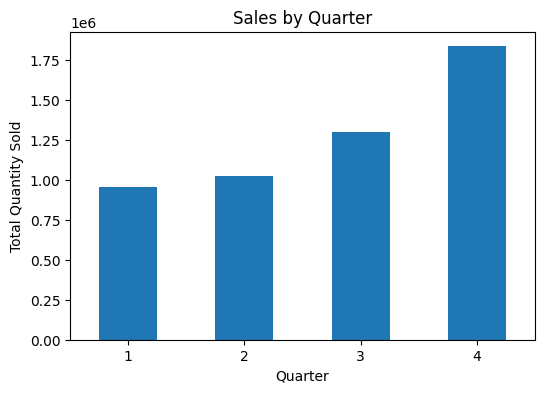

In [38]:
# 분기별 시즌성
df["Quarter"] = df["InvoiceDate"].dt.quarter

quarter_sales = df.groupby("Quarter")["Quantity"].sum()

plt.figure(figsize=(6,4))
quarter_sales.plot(kind="bar")
plt.title("Sales by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=0)
plt.show()

**-> 10월~12월 성수기(크리스마스 영향)**

- 주로 홈데코, 파티용품, 선물용품 위주의 영국 도매 쇼핑몰이라는 것을 확인할 수 있음

In [41]:
# 월별 가장 잘 팔리는 상품 보기(top 5)
top5 = (
    monthly_product_sum
    .sort_values(["YearMonth", "Quantity"], ascending=[True, False])
    .groupby("YearMonth")
    .head(5)
)

In [45]:
# 평균 구매 수량이 높은 상품 찾기(한 번에 많이 사는 상품군)
high_avg = (
    df.groupby("Description")["Quantity"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

print(high_avg)

Description
PAPER CRAFT , LITTLE BIRDIE            80995.000000
TEA TIME TEA TOWELS                     1300.000000
GIRLS ALPHABET IRON ON PATCHES           480.000000
MEDIUM CERAMIC TOP STORAGE JAR           393.515152
ESSENTIAL BALM 3.5G TIN IN ENVELOPE      325.333333
Name: Quantity, dtype: float64


#1️⃣ PAPER CRAFT , LITTLE BIRDIE

👉 종이 공예용 작은 새 장식

- 평균 구매 수량: 80,995개
- 한 번의 초대량 주문/도매 납품

#2️⃣ TEA TIME TEA TOWELS

👉 티타임용 행주/키친타월 세트

- 평균 1,300개/도매성 대량 구매 가능성 존재

#3️⃣ GIRLS ALPHABET IRON ON PATCHES

👉 여자아이용 알파벳 다림질 패치

- 평균 480개

- 의류 부착용 패치/ 묶음 판매 상품 가능성 높음

#4️⃣ MEDIUM CERAMIC TOP STORAGE JAR

👉 중간 크기 세라믹 뚜껑 보관 용기

- 평균 393개

#5️⃣ ESSENTIAL BALM 3.5G TIN IN ENVELOPE

👉 3.5g 에센셜 밤(연고) 틴 케이스 제품

- 평균 325개

- 작은 화장품/보습제/선물용 묶음 구매 가능성 높음



In [23]:
# PAPER CRAFT , LITTLE BIRDIE - 해당 상품의 판매 패턴을 확인하기 위해
df[df["Description"] == "PAPER CRAFT , LITTLE BIRDIE"]["Quantity"].describe()

,Quantity
count,1.0
mean,80995.0
std,NaN
min,80995.0
25%,80995.0
50%,80995.0
75%,80995.0
max,80995.0


-> 여러 번 팔린 것이 아닌 대량으로 한 번만 주문된 상품

In [46]:
# 가장 자주 팔린 상품(주문 횟수 기준)
df.groupby("Description")["InvoiceNo"].nunique().sort_values(ascending=False).head(5)

,InvoiceNo
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1971
REGENCY CAKESTAND 3 TIER,1703
JUMBO BAG RED RETROSPOT,1600
PARTY BUNTING,1379
ASSORTED COLOUR BIRD ORNAMENT,1375


#1️⃣ WHITE HANGING HEART T-LIGHT HOLDER

👉 흰색 하트 모양 티라이트 캔들 홀더

- 1,971번의 주문에 등장

- 가장 자주 팔린 상품이자 인기 상품

#2️⃣ REGENCY CAKESTAND 3 TIER

👉 3단 레전시 스타일 케이크 스탠드

- 1,703번 주문

- 홈파티/티타임용 인기 제품

#3️⃣ JUMBO BAG RED RETROSPOT

👉 대형 빨간 도트무늬 가방

- 1,600번 주문

- 여러 달 베스트였던 상품

#4️⃣ PARTY BUNTING

👉 파티용 깃발 장식 (배너)

- 1,379번 주문

- 행사/파티용 장식

#5️⃣ ASSORTED COLOUR BIRD ORNAMENT

👉 다양한 색상의 새 장식품

1,375번 주문

인테리어/시즌 장식용

In [47]:
# 1회 팬매 상품 제거
product_stats = df.groupby("Description").agg({
    "Quantity": ["sum", "mean", "count"]
})

product_stats.columns = ["TotalQty", "AvgQty", "OrderCount"]

# 주문 10회 이상 상품만
filtered = product_stats[product_stats["OrderCount"] >= 10]

# 총 판매수량/평균 구매수량/주문횟수
filtered.sort_values("TotalQty", ascending=False).head(5)

,TotalQty,AvgQty,OrderCount
Description,,,
MEDIUM CERAMIC TOP STORAGE JAR,77916,393.515152,198
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319,115.082627,472
JUMBO BAG RED RETROSPOT,46078,28.531269,1615
WHITE HANGING HEART T-LIGHT HOLDER,36706,18.207341,2016
ASSORTED COLOUR BIRD ORNAMENT,35263,25.278136,1395


**WHITE HANGING HEART T-LIGHT HOLDER와 JUMBO BAG RED RETROSPOT**은 주문 빈도 매우 높음 -> 스테디셀러 성격이 강함.


**MEDIUM CERAMIC TOP STORAGE JAR** ->  주문 빈도는 낮지만, 주문당 구매 수량이 매우 높음 -> 도매형 수요가 큰 상품으로 해석.